Simplex 0: ['(0,0)', '(1,0)', '(0,1)']
Simplex 1: ['(0,0)', '(1,0)', '(0,1)', '(1,1)']
Simplex 2: ['(0,0)', '(1,0)', '(0,1)', '(1,1)']
Simplex 3: ['(0,0)', '(1,0)', '(0,1)', '(1,1)', '(2,2)']


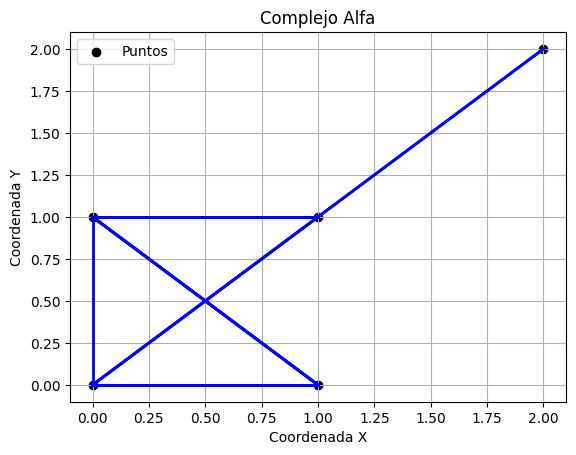

Filtración de complejos de Vietoris-Rips:
[0, 1]
[0, 2]
[1, 3]
[2, 3]


In [4]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import itertools

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def euclidean_distance(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)

def alpha_complex(points):
    # Calcular todas las distancias únicas entre puntos
    distances = set()
    for i, p1 in enumerate(points):
        for j, p2 in enumerate(points):
            if i < j:
                distances.add(euclidean_distance(p1, p2))

    # Ordenar las distancias en orden ascendente
    sorted_distances = sorted(distances)

    # Inicializar la estructura de datos para la filtración alfa
    alpha_filtration = []

    # Iterar sobre las distancias y agregar vértices y aristas según sea necesario
    for distance in sorted_distances:
        simplex = [point for point in points if euclidean_distance(point, points[0]) <= distance]

        if len(simplex) > 1:
            alpha_filtration.append(simplex)

    return alpha_filtration

def plot_alpha_complex(points, alpha_filtration):
    # Crear una figura
    plt.figure()

    # Dibujar los puntos
    x = [point.x for point in points]
    y = [point.y for point in points]
    plt.scatter(x, y, c='black', label='Puntos')

    # Dibujar los bordes del complejo alfa
    for simplex in alpha_filtration:
        if len(simplex) == 2:
            # Dibujar una arista
            plt.plot([simplex[0].x, simplex[1].x], [simplex[0].y, simplex[1].y], c='blue', linestyle='-', linewidth=2)
        elif len(simplex) > 2:
            # Dibujar un triángulo (puedes adaptar esto para dimensiones superiores)
            for i in range(len(simplex)):
                x_values = [simplex[i].x, simplex[(i+1)%len(simplex)].x]
                y_values = [simplex[i].y, simplex[(i+1)%len(simplex)].y]
                plt.plot(x_values, y_values, c='blue', linestyle='-', linewidth=2)

    # Configuración de la gráfica
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Complejo Alfa')
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

def vietoris_rips_filtration(points, epsilon):
    # Crear un grafo no dirigido vacío
    G = nx.Graph()

    # Agregar nodos al grafo para representar los puntos
    for i, p1 in enumerate(points):
        G.add_node(i, pos=p1)

    # Agregar aristas entre puntos que están a una distancia menor o igual a epsilon
    for (i, p1), (j, p2) in itertools.combinations(enumerate(points), 2):
        if euclidean_distance(p1, p2) <= epsilon:
            G.add_edge(i, j)

    # Calcular la filtración de complejos de Vietoris-Rips
    filtration = []
    for edge in G.edges():
        filtration.append([edge[0], edge[1]])

    return filtration


# Ejemplo de uso:
if __name__ == "__main__":
    # Definir un conjunto de puntos en el plano
    points = [Point(0, 0), Point(1, 0), Point(0, 1), Point(1, 1), Point(2, 2)]

    # Calcular la filtración alfa asociada
    alpha_filtration = alpha_complex(points)

    # Imprimir la filtración alfa
    for i, simplex in enumerate(alpha_filtration):
        print(f"Simplex {i}: {[f'({p.x},{p.y})' for p in simplex]}")

    # Representar gráficamente el complejo alfa
    plot_alpha_complex(points, alpha_filtration)

    # Definir un conjunto de puntos en el plano
    #points = [(0, 0), (1, 0), (0, 1), (1, 1), (2, 2)]

    # Valor de epsilon (distancia máxima para conectar puntos)
    epsilon = 1.0

    # Calcular la filtración de complejos de Vietoris-Rips
    vietoris_rips_filtration_result = vietoris_rips_filtration(points, epsilon)

    # Imprimir la filtración resultante
    print("Filtración de complejos de Vietoris-Rips:")
    for simplex in vietoris_rips_filtration_result:
        print(simplex)
    
